##Eartquake Analysis of Turkey 

---

#import datasets and libraries

In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

In [2]:
turkey = pd.read_csv('datasets/earthquake.csv')
turkey21 = pd.read_csv('datasets/turkey_earthquakes(1915-2021).csv', low_memory=False) # low_memory=False is used to avoid warning

# datasets found on Kaggle

----

#analysis with using datasets

In [3]:
turkey.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [4]:
turkey21.head()

,No,DepremKodu,Olustarihi,Oluszamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1.0,2.021010e+18,1.01.2021,16:36,359273.0,278658,26.01.2023,3.09.2023,0.0,3.09.2023,3.07.2023,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2.0,2.020120e+18,31.12.2020,00:51,378435.0,267775,8,3.08.2023,0.0,3.08.2023,3.07.2023,0.0,0.0,Ke,EGE DENIZI
2,3.0,2.020120e+18,30.12.2020,18:45,364918.0,287092,5,3.09.2023,0.0,3.07.2023,3.09.2023,0.0,0.0,Ke,AKDENIZ
3,4.0,2.020120e+18,30.12.2020,13:40,37796.0,264165,14.04.2023,4.04.2023,0.0,4.04.2023,4.03.2023,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5.0,2.020120e+18,27.12.2020,20:08,384172.0,391482,5,3.09.2023,0.0,3.07.2023,3.09.2023,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [5]:
# sb.set_theme(style="whitegrid")

# sb.pairplot(turkey.head(5), hue="direction", palette="Set1")
# plt.show()

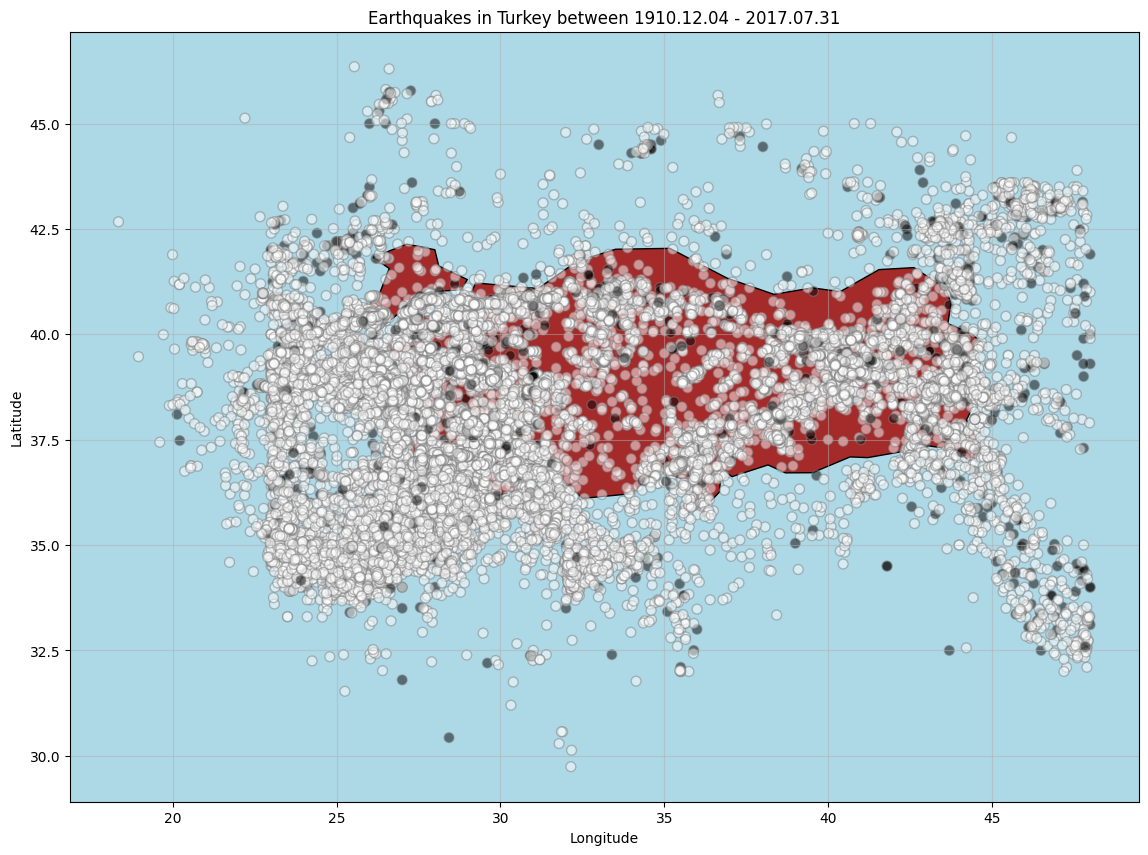

In [6]:

fig, ax = plt.subplots(figsize=(15,10))
ax.set_facecolor("lightblue")

fig.patch.set_alpha(0.0)

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries[countries["name"] == "Turkey"].plot(ax=ax, color="brown", edgecolor="black")

first_month = turkey["date"].min()
last_month = turkey["date"].max()

color = np.where(turkey["xm"] > 5, "black", "white")

turkey.plot(x="long", y="lat", kind="scatter", c=color, title=f"Earthquakes in Turkey between {first_month} - {last_month}", ax=ax, alpha=0.5, marker = "o", s=50, edgecolor="grey")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.grid(visible=True, alpha=0.5)

plt.show()

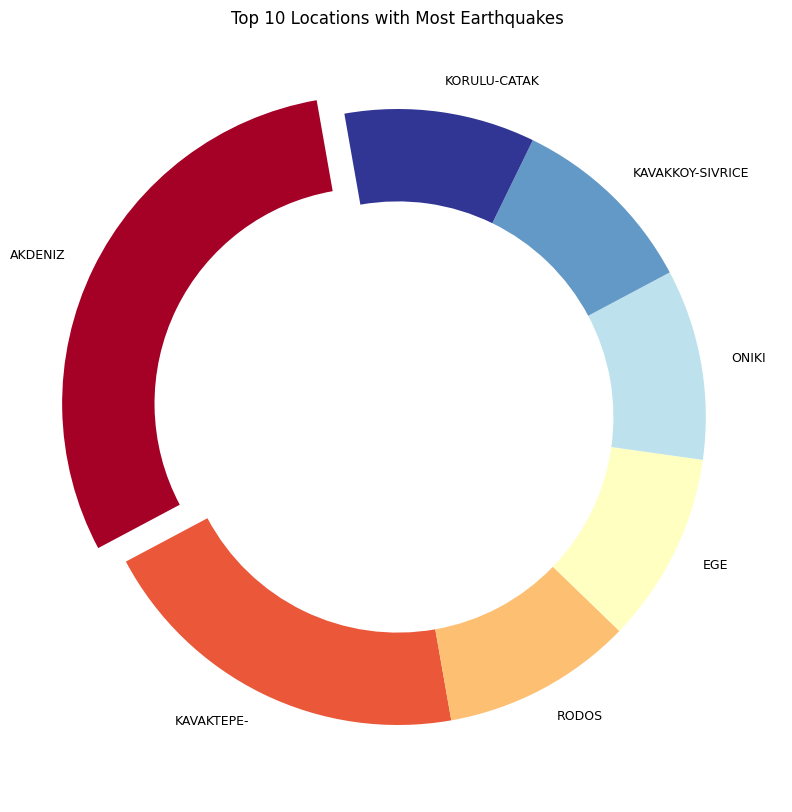

In [7]:
city = turkey21["Yer"].dropna()

cities = city.str.split(" ", expand=True) # split the string into a list

fig, ax = plt.subplots(figsize=(10,10))

cities[0].head(10).value_counts().plot(kind = "pie",
                                    cmap="RdYlBu", 
                                    labels=cities[0].head(10).value_counts().index, 
                                    pctdistance=0.9, 
                                    labeldistance=1.1, 
                                    startangle=100, 
                                    textprops={'fontsize': 9}, 
                                    wedgeprops=dict(width=0.3),
                                    explode=[0.1 if i == 'AKDENIZ' else 0 for i in cities[0].head(10).value_counts().index])
plt.title("Top 10 Locations with Most Earthquakes")
plt.ylabel("")

plt.show()

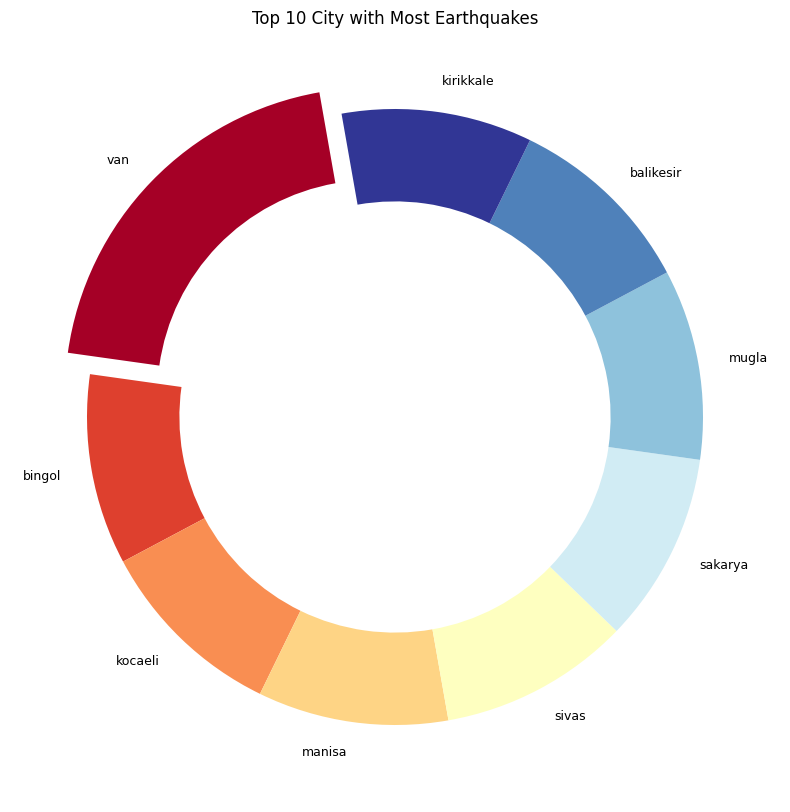

In [8]:
cities = turkey["city"].dropna()

fig, ax = plt.subplots(figsize=(10,10))

cities.nunique()

cities.head(10).value_counts().plot(kind = "pie", 
                                    cmap="RdYlBu", 
                                    labels=cities.head(10).value_counts().index, 
                                    pctdistance=0.9, 
                                    labeldistance=1.1, 
                                    startangle=100, 
                                    textprops={'fontsize': 9}, 
                                    wedgeprops=dict(width=0.3),
                                    explode=[0.1 if i == 'van' else 0 for i in cities.head(10).value_counts().index],
                                    ax = ax)

plt.title("Top 10 City with Most Earthquakes")
plt.ylabel("")

plt.show()

-----

#predicts/machine learnings

-green line is the prediction
-grey squares are the actual data


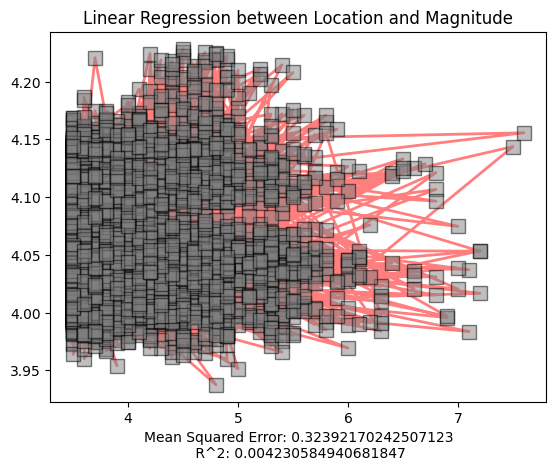

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ["lat", "long"]

X = turkey[features]
Y = turkey["xm"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, shuffle = True)

lr = LinearRegression()
lr.fit(X_train, Y_train)

pred = lr.predict(X_test)

print("-green line is the prediction\n-grey squares are the actual data")
plt.title("Linear Regression between Location and Magnitude")
plt.plot(Y_test, pred, color="r", label="Prediction", alpha=0.5, linewidth=2, markersize=10, marker="o", markerfacecolor="grey", markeredgecolor="black", markeredgewidth=1)

plt.xlabel(f"Mean Squared Error: {mean_squared_error(Y_test, pred)}\n R^2: {lr.score(X_test, Y_test)}")
plt.show()

-0.002693113205935633 x +  4.15818619048719  = 0


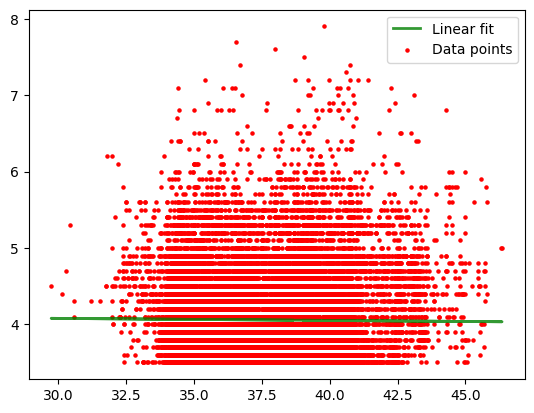

In [10]:
x = turkey["lat"]
y = turkey["xm"]

fit = np.polyfit(x,y,1)
ang = fit[0]
intercept = fit[1]
fit_eq = ang*x + intercept  #obtaining the y axis values for the fitting function

print(ang,"x + ", intercept, " = 0")

fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'g', alpha = 0.8, label = 'Linear fit', linewidth = 2)
ax.scatter(x, y, s = 5, color = 'r', label = 'Data points')
ax.legend()
plt.show()

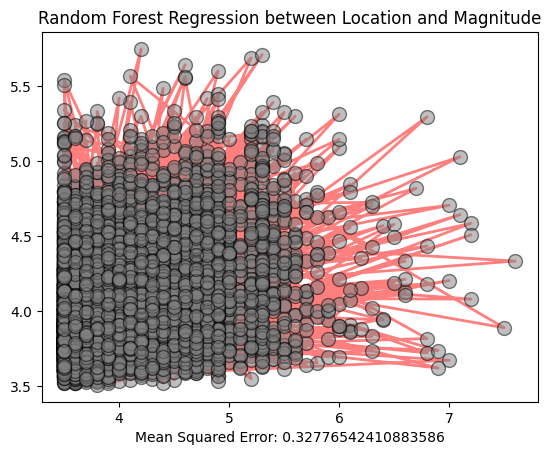

In [11]:
from sklearn.ensemble import RandomForestRegressor

#create RandomForest
forest = RandomForestRegressor(n_estimators=100)

#training the model
forest.fit(X_train,Y_train)

y_pred = forest.predict(X_test)

plt.plot(Y_test, y_pred, color="r", label="Prediction", alpha=0.5, linewidth=2, markersize=10, marker="o", markerfacecolor="grey", markeredgecolor="black", markeredgewidth=1)
plt.title("Random Forest Regression between Location and Magnitude")
plt.xlabel(f"Mean Squared Error: {mean_squared_error(Y_test, y_pred)}")
plt.show()

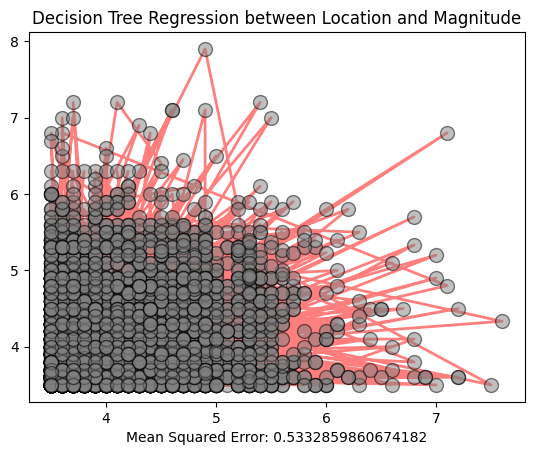

In [12]:
from sklearn.tree import DecisionTreeRegressor

#create DecisionTree
decisionTree = DecisionTreeRegressor()

#training the model
decisionTree.fit(X_train,Y_train)

y_pred = decisionTree.predict(X_test)

plt.plot(Y_test, y_pred, color="r", label="Prediction", alpha=0.5, linewidth=2, markersize=10, marker="o", markerfacecolor="grey", markeredgecolor="black", markeredgewidth=1)
plt.title("Decision Tree Regression between Location and Magnitude")
plt.xlabel(f"Mean Squared Error: {mean_squared_error(Y_test, y_pred)}")
plt.show()

In [13]:
# import graphviz
# from sklearn import tree
# from sklearn.tree import export_graphviz

# dot_data = tree.export_graphviz(decisionTree,
#                                 feature_names = features, 
#                                 class_names="xm",
#                                 filled = True,
#                                 out_file = None, 
#                                 impurity = True, 
#                                 rounded = True,
#                                 special_characters = True)

# graphviz.Source(dot_data)